#Computing in Context
##Social Science Section
##lecture two
OK, so we didn't get into the code this week...

#History at Scale: what would you do if you could *read* at scale?

examples of *not exclusively numerical* data sources

http://dohistory.org/diary/index.html

http://dlxs.richmond.edu/d/ddr/index.html

http://www.oldbaileyonline.org/

http://www.masshist.org/digitaladams/archive/index

https://archivesholdings.worldbank.org/

http://docsouth.unc.edu/index.html

http://about.jstor.org/service/data-for-research


###**Choose** to make tractable--**Choose** to lose to learn something couldn't otherwise! 

#The **EASIER** Way

Awesome **tools** to automate process


http://voyant-tools.org/
    
http://papermachines.org/

#The HARDER Way

##Why, oh why?

- flexibility
    - overcome limits of affordances
- can't depend on lots of tools 
- understand epistemic trade offs
- gateway to vast array of work in data sciences *more generally*


###computers not so smart
###computer not so good with non numerical things


##Vectoring text, or: the world is too hard to understand easily

In [1]:
%matplotlib inline
import pandas as pd


In [2]:
def document_vector(wordstring): 
    """put yer documentation here friend"""
    wordlist = wordstring.split()
    set_of_words=set(wordlist)
    distinct_words=list(set_of_words)
    wordfreq = [wordlist.count(w) for w in distinct_words]
    return distinct_words, wordfreq

In [3]:
x,y = document_vector("I like to eat green apples but only if I eat them like green grapes like my green friend gripes")

In [4]:
x

['only',
 'them',
 'green',
 'my',
 'but',
 'eat',
 'I',
 'grapes',
 'to',
 'apples',
 'if',
 'gripes',
 'like',
 'friend']

In [5]:
y

[1, 1, 3, 1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1]

In [6]:
documents=pd.DataFrame(y, index=x)

In [7]:
documents

,0
only,1
them,1
green,3
my,1
but,1
eat,2
I,2
grapes,1
to,1
apples,1


#cool beans--we've vectorized our sentence
#what has been lost?



In [8]:
documents[0].order()

only      1
them      1
my        1
but       1
grapes    1
to        1
apples    1
if        1
gripes    1
friend    1
eat       2
I         2
green     3
like      3
Name: 0, dtype: int64

In [9]:
documents[0].describe()

count    14.000000
mean      1.428571
std       0.755929
min       1.000000
25%       1.000000
50%       1.000000
75%       1.750000
max       3.000000
Name: 0, dtype: float64

Once we convert texts into vectors, computer doesn't care or know that we're dealing with something formerly known as texts. It's just another kind of vector . . . 


##Term frequency [TF]
The "term frequency" measures how often a given term occurs in a given document.

We count up how many times each term appears in a document, then divide it by the number of terms in the document.

For a word $t$ that appears $i_w$ times in a document $D$ with a number of words $n_D$, the term frequency is

$tf(t,D)=\frac{i_w}{n_D}$

Can you think of a problem with this as a measure?


In [10]:
def document_vector_freq(wordstring): 
    """put yer documentation here friend"""
    wordlist = wordstring.split()
    number_of_words=len(wordlist)
    set_of_words=set(wordlist)
    distinct_words=list(set_of_words)
    wordfreq = [wordlist.count(w) for w in distinct_words]
    wordfreq = [word_freq/number_of_words for word_freq in wordfreq]
    return distinct_words, wordfreq


# Inverse document frequency
Often we'll divide the term frequency using some measure of how unusual each word is across all the documents in question. 

If we were reading general political news stories for the last few years, "Obama" appears *a lot* in each document and in lots of documents. "Butte" appears, say, a lot in one document but not at all in the rest.

We want something that will help us to see that "Butte" is really significant for capturing something distinctive about that document, whereas "Obama" wouldn't be. 

So we compute the *inverse document frequency*. [IDF]

You divide the total number of documents ($N$)
by one plus the number of documents containing each word t ($n_w$)

$\frac{N}{1+n_w}$

Think about what is this does:
for a word that appears in *every* document will thus be 


$\frac{N}{1+n_w}=\frac{N}{1+N}\approx 1$ 

Where a word appears that in only *one* document will have a much bigger scaling factor:


$\frac{N}{1+n_w}=\frac{N}{2}$.

Typically, we take the log of this to get:

$idf(t,D)=\log(\frac{N}{1+n_w})$.

So we'll computer what's called tf-idf in the biz by multiplying the frequency and the inverse document frequency:

$tfidf=tf\times idf$


As so often, this is not a neutral choice: 

- if we pick $tf$ by itself, we want the most frequent words normalized by length in each document. 

- if we pick $tfidf$, then we are saying we want to work with the most frequent words that are also *usual* across our particular set of documents.

If we use tfidf on a set of documents about the CIA from 2000-2010, "intelligence" would be in most of them, we'd guess, and so the measure would down-play them in favor of what makes each document more distinctive *within* the corpus.


#What we need to clean up text


##tokenization
making `.split` much better Examples??

##stemming:
- converting inflected forms into some normalized forms
    - e.g. "chefs" --> "chef"
    - "goes" --> "go"
    - "children" --> "child"

##stopwords
they are the words you don't want to be included:
"from" "to" "a" "they" "she" "he"

##others?

#Let's get some data!
##Documenting the American South

http://docsouth.unc.edu/docsouthdata/

In [11]:
directory="/Users/mljones/Downloads/na-slave-narratives/data/texts/"   #PUT YOUR DIRECTORY HERE!

In [12]:
import sys, os

In [13]:
##I will provide a set of black boxes for this sort of thing soon; then you will import textmining_blackboxes

In [14]:
os.chdir(directory)
files=[file for file in os.listdir(".") if not file.startswith('.')] #defeat hidden files
files=[file for file in files if not os.path.isdir(file)==True] #defeat directories

articles=[]
file_titles=[]
for file in files:
    with open(file, encoding="UTF-8") as plaintext:
        lines=plaintext.readlines()
        #lines=[str(line) for line in lines]
        article=" ".join(lines) #alter lines if want to skip lines
        articles.append(article)
        file_titles.append(file) #keep track of file names

In [15]:
articles[2][:500]

'\n Wm. W. Brown.[Frontispiece Image]\n [Title Page Image]\n [Title Page Verso Image]\n \n _______Is there not some chosen curse,\n Some hidden thunder in the stores of heaven,\n Red with uncommon wrath, to blast the man\n who gains his fortune from the blood of souls !\n \n Cowper.\n PREFACE\n TO WELLS BROWN, OF OHIO.\n THIRTEEN years ago, I came to your door, a weary fugitive from chains and stripes. I was a stranger, and you took me in. I was hungry, and you fed me. Naked was I, and you clothed me. Even a '

In [16]:
import re

In [17]:
re.sub('\n', '', articles[2])[:500]

' Wm. W. Brown.[Frontispiece Image] [Title Page Image] [Title Page Verso Image]  _______Is there not some chosen curse, Some hidden thunder in the stores of heaven, Red with uncommon wrath, to blast the man who gains his fortune from the blood of souls !  Cowper. PREFACE TO WELLS BROWN, OF OHIO. THIRTEEN years ago, I came to your door, a weary fugitive from chains and stripes. I was a stranger, and you took me in. I was hungry, and you fed me. Naked was I, and you clothed me. Even a name by which'

In [18]:
documents=pd.DataFrame(y, index=x)

In [19]:
documents

,0
only,1
them,1
green,3
my,1
but,1
eat,2
I,2
grapes,1
to,1
apples,1


#Here's our help!

###Python Libraries

Python has an embarrasment of riches when it comes to working with texts. Some libraries are higher level with simpler, well thought out defaults, namely `pattern` and `TextBlob`. Most general, of long development, and foundational is the Natural Language Tool Kit--NLTK. The ideas we'll learn to today are key--they have slightly different instantiations in the different tools. Not everything is yet in Python 3.

For now, we'll play with the cool scientists and use the powerful and fast scikit learn package.

In [21]:
vectorizer=TfidfVectorizer(min_df=0.95, stop_words='english')  
#.95 is a VERY high threshold--only the most common words--chosen for the form of visualization we're going to do

In [22]:
document_term_matrix=vectorizer.fit_transform(articles)

In [23]:
document_term_matrix.shape

(294, 63)

In [24]:
#output is number of documents, then size of remaining vocabulary
rows, terms=document_term_matrix.shape

In [25]:
vocab=vectorizer.get_feature_names()

In [26]:
len(vocab)

63

In [27]:
dtm=document_term_matrix.toarray()
dtmdf=pd.DataFrame(dtm, columns=vocab)

put into pandas just so we could explore it a bit more elegantly

In [28]:
dtmdf

,away,better,born,brought,called,came,children,come,country,day,...,things,thought,time,took,way,went,white,work,year,years
0,0.062433,0.033243,0.035528,0.049360,0.059921,0.096732,0.030062,0.076005,0.051750,0.156397,...,0.146825,0.060125,0.272108,0.085984,0.202831,0.162316,0.137111,0.074040,0.002733,0.077396
1,0.082805,0.031445,0.005816,0.071007,0.084052,0.209683,0.080460,0.086656,0.124629,0.273618,...,0.027514,0.052348,0.282063,0.091498,0.088040,0.106514,0.055444,0.149795,0.041684,0.068160
2,0.067857,0.057208,0.023763,0.041727,0.074008,0.160624,0.068319,0.041304,0.053286,0.204558,...,0.015055,0.098022,0.290007,0.125579,0.066716,0.123493,0.134121,0.092395,0.050496,0.113127
3,0.079088,0.086923,0.008167,0.040973,0.099704,0.110405,0.104126,0.064892,0.134295,0.162387,...,0.047600,0.028584,0.223020,0.072265,0.081746,0.084883,0.264273,0.188474,0.102084,0.119628
4,0.136277,0.019869,0.034301,0.068836,0.058603,0.211983,0.249909,0.087607,0.078137,0.280421,...,0.084441,0.078403,0.194210,0.105991,0.071779,0.247379,0.167172,0.132754,0.053902,0.119631
5,0.058159,0.077162,0.029278,0.017626,0.023343,0.103627,0.187377,0.133767,0.029178,0.323734,...,0.083097,0.076122,0.311318,0.103627,0.182982,0.075351,0.047003,0.193889,0.146388,0.160109
6,0.027531,0.042146,0.013859,0.013907,0.151937,0.177143,0.083157,0.068829,0.041437,0.255415,...,0.014049,0.041578,0.455511,0.095385,0.094740,0.192068,0.111252,0.069533,0.138594,0.108275
7,0.208734,0.012531,0.030905,0.031010,0.049281,0.164082,0.228698,0.061392,0.012320,0.179858,...,0.012531,0.067991,0.256924,0.048617,0.132793,0.220265,0.074424,0.223273,0.098896,0.114685
8,0.079807,0.122173,0.040175,0.000000,0.080079,0.000000,0.160701,0.039904,0.080079,0.077936,...,0.000000,0.080351,0.194180,0.039500,0.078466,0.039769,0.040312,0.080624,0.040175,0.078466
9,0.251497,0.030800,0.040513,0.010163,0.020188,0.009958,0.040513,0.130778,0.040376,0.176831,...,0.030800,0.060770,0.205605,0.019916,0.049454,0.010026,0.020326,0.030488,0.020257,0.059345


#Now we can throw wide variety of mining algorithms at our data!

#Similarity and dissimilarity

We reduced our text to a vector of term-weights. What can we do once we've committed this violence on the text?

We can measure *distance* and *similarity*

I know. Crazy talk.

Right now our text is just a series of numbers, indexed to words. We can treat it like any other set of words.

And the key way to distinguish two vectors is by measuring their distance or computing their similiarity (`1-distance`).

You already know how, though you may have buried it along with memories of high school.

#Many distance metrics to choose from
## key one in textual analysis:
### cosine similarity


If $\mathbf{a}$ and $\mathbf{b}$ are vectors, then

$\mathbf{a}\cdot\mathbf{b}=\left\|\mathbf{a}\right\|\left\|\mathbf{b}\right\|\cos\theta$

Or

$\text{similarity} = \cos(\theta) = {A \cdot B \over \|A\| \|B\|} = \frac{ \sum\limits_{i=1}^{n}{A_i \times B_i} }{ \sqrt{\sum\limits_{i=1}^{n}{(A_i)^2}} \times \sqrt{\sum\limits_{i=1}^{n}{(B_i)^2}} }$

In [29]:
#easy to program, but let's use a robust version
from sklearn.metrics.pairwise import cosine_similarity


In [30]:
#cosine similarity is vectorized: that means is will operate on an entire matrix, not just its individual elements


In [31]:
similarity=cosine_similarity(dtmdf)

In [32]:
similarity

array([[ 1.        ,  0.68264883,  0.76388739, ...,  0.54432244,
         0.82308187,  0.74060483],
       [ 0.68264883,  1.        ,  0.87835427, ...,  0.41133783,
         0.76848862,  0.6303793 ],
       [ 0.76388739,  0.87835427,  1.        , ...,  0.51797058,
         0.86520961,  0.61500274],
       ..., 
       [ 0.54432244,  0.41133783,  0.51797058, ...,  1.        ,
         0.70739313,  0.50234307],
       [ 0.82308187,  0.76848862,  0.86520961, ...,  0.70739313,
         1.        ,  0.70527606],
       [ 0.74060483,  0.6303793 ,  0.61500274, ...,  0.50234307,
         0.70527606,  1.        ]])

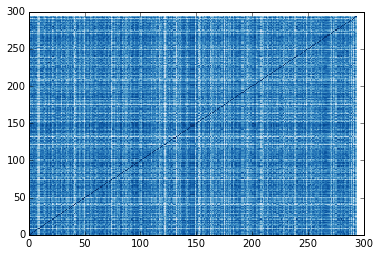

In [33]:
import matplotlib.pyplot as plt 
#we can make a heatmap with no problems within mathplotlib
#pass plt.pcolor our similiarity matrix
plt.pcolor(similarity, norm=None, cmap='Blues')

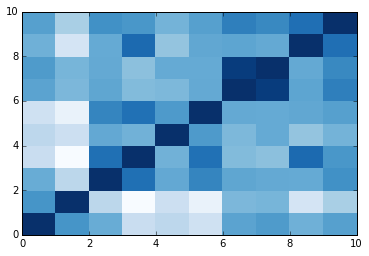

In [34]:
#we have too many documents for that to be very useful; so
plt.pcolor(similarity[100:110, 100:110], norm=None, cmap='Blues')

#supervised vs. unsupervised learning

In [35]:
##first example of unsupervised learning
###hierarchical clustering


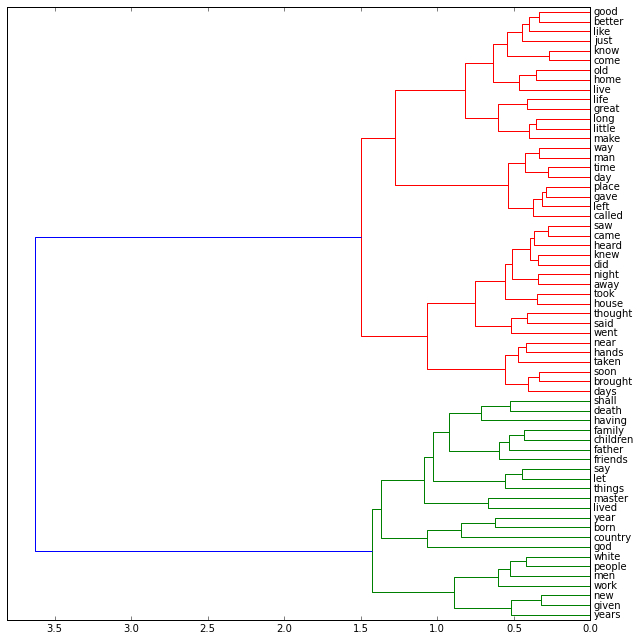

In [36]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
dtm=document_term_matrix
dtm_trans=dtm.T
dist=1-cosine_similarity(dtm_trans)
linkage_matrix=ward(dist)

#plot dendogram

f=plt.figure(figsize=(9,9))
R=dendrogram(linkage_matrix, orientation="right", labels=vocab)
plt.tight_layout()


##is this significant? Are there interesting patterns to seek out?

##here's what we're up to:

Exploratory data analysis (EDA) seeks to reveal structure, or simple descriptions, in data. We look at numbers and graphs and try to find patterns. 

-. . . we can view the techniques of EDA as a ritual designed to reveal patters in a data set. Thus, we may believe that naturally occurring data sets contain structure, that EDA is a useful vehicle for revealing the structure. . . . If we make no attempt to check whether the structure could have arisen by chance, and tend to accept the findings as gospel, then the ritual comes close to magical thinking. ... a controlled form of magical thinking--in the guise of 'working hypothesis'--is a basic ingredient of scientific progress. 
- Persi Diaconis, "Theories of Data Analysis: From Magical Thinking Through Classical statistics" 


##need to elicit patterns and avoid bad magical thinking!